📂 Loading data from: C:\Users\Prashant Jha\OneDrive\Documents\vs code\Credi_Risk\data\south_german_credit.csv
✅ Saved: class_dist_before_smote_german.png


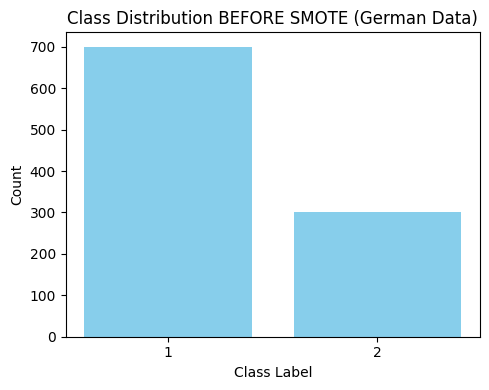

✅ Saved: class_dist_after_smote_german.png


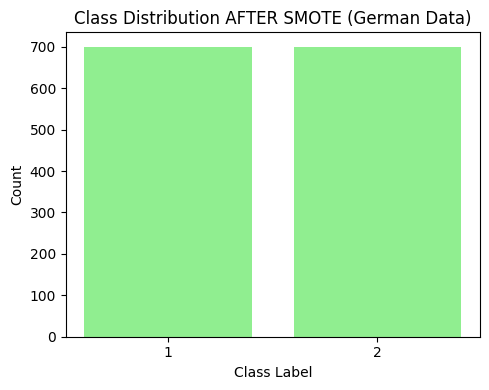

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from collections import Counter

# Define BASE_DIR for notebooks
BASE_DIR = Path().resolve().parent   # if running from notebooks/

# Define relative paths
data_dir = BASE_DIR / "data"
eval_dir = BASE_DIR / "evaluation"

csv_path = data_dir / "south_german_credit.csv"
y_path = data_dir / "y_resampled_german.npy"

# Create evaluation directory if it doesn't exist
eval_dir.mkdir(exist_ok=True)

# Load raw CSV
print("📂 Loading data from:", csv_path)
df = pd.read_csv(csv_path)

# Plot BEFORE SMOTE
counts_before = df["Credit_Risk"].value_counts().sort_index()
labels_before = counts_before.index.astype(str)

plt.figure(figsize=(5, 4))
plt.bar(labels_before, counts_before.values, color="skyblue")
plt.title("Class Distribution BEFORE SMOTE (German Data)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(eval_dir / "class_dist_before_smote_german.png")
print("✅ Saved: class_dist_before_smote_german.png")
plt.show()

# Load resampled labels
y_resampled = np.load(y_path)

# Plot AFTER SMOTE
counts_after = Counter(y_resampled)
labels_after = [str(k) for k in sorted(counts_after.keys())]
values_after = [counts_after[k] for k in sorted(counts_after.keys())]

plt.figure(figsize=(5, 4))
plt.bar(labels_after, values_after, color="lightgreen")
plt.title("Class Distribution AFTER SMOTE (German Data)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(eval_dir / "class_dist_after_smote_german.png")
print("✅ Saved: class_dist_after_smote_german.png")
plt.show()
